**Importing the Packages**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Importing the Data**

In [2]:
df=pd.read_excel('Pizza Sales.xlsx')

In [3]:
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,212,ital_cpcllo_l,1,2015-01-04,13:16:03,20.50,20.50,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
496,497,213,four_cheese_l,1,2015-01-04,13:20:39,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
497,498,214,ital_cpcllo_l,1,2015-01-04,13:39:16,20.50,20.50,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
498,499,214,ital_supr_m,1,2015-01-04,13:39:16,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [4]:
df.head()


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   500 non-null    int64         
 1   order_id           500 non-null    int64         
 2   pizza_id           500 non-null    object        
 3   quantity           500 non-null    int64         
 4   order_date         500 non-null    datetime64[ns]
 5   order_time         500 non-null    object        
 6   unit_price         500 non-null    float64       
 7   total_price        500 non-null    float64       
 8   pizza_size         500 non-null    object        
 9   pizza_category     500 non-null    object        
 10  pizza_ingredients  500 non-null    object        
 11  pizza_name         500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 47.0+ KB


In [6]:
for i in df.columns:
    print(i+' :'+str(df[i].nunique()))

order_details_id :500
order_id :214
pizza_id :85
quantity :3
order_date :4
order_time :214
unit_price :24
total_price :29
pizza_size :4
pizza_category :4
pizza_ingredients :32
pizza_name :32


In [7]:
Topcategory=df.groupby(df['pizza_category'])['order_id'].agg(["count"]).reset_index()
print(Topcategory)

  pizza_category  count
0        Chicken    113
1        Classic    156
2        Supreme    119
3         Veggie    112


Text(0.5, 1.0, 'MOST SELLING CATEGORY')

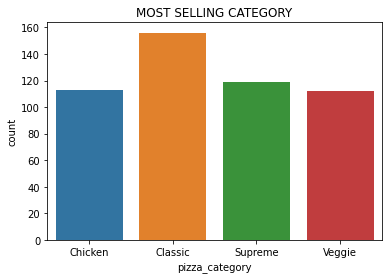

In [8]:
graph=sns.barplot(x='pizza_category',y='count',data=Topcategory)
graph.set_title('MOST SELLING CATEGORY')

In [9]:
MostOrderedPizza=df.groupby("pizza_name")["order_id"].agg(["count"]).sort_values(by="count",ascending=False).reset_index()
print(MostOrderedPizza)

                                    pizza_name  count
0                          The Pepperoni Pizza     29
1                    The Italian Supreme Pizza     28
2                       The Thai Chicken Pizza     27
3                   The Barbecue Chicken Pizza     26
4                 The California Chicken Pizza     24
5                           The Hawaiian Pizza     21
6                      The Spicy Italian Pizza     21
7                     The Classic Deluxe Pizza     21
8                           The Big Meat Pizza     20
9                  The Italian Capocollo Pizza     20
10                             The Greek Pizza     20
11                          The Mexicana Pizza     19
12                 The Southwest Chicken Pizza     18
13                          The Sicilian Pizza     17
14                       The Five Cheese Pizza     17
15                       The Four Cheese Pizza     17
16            The Prosciutto and Arugula Pizza     16
17                   The Spi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

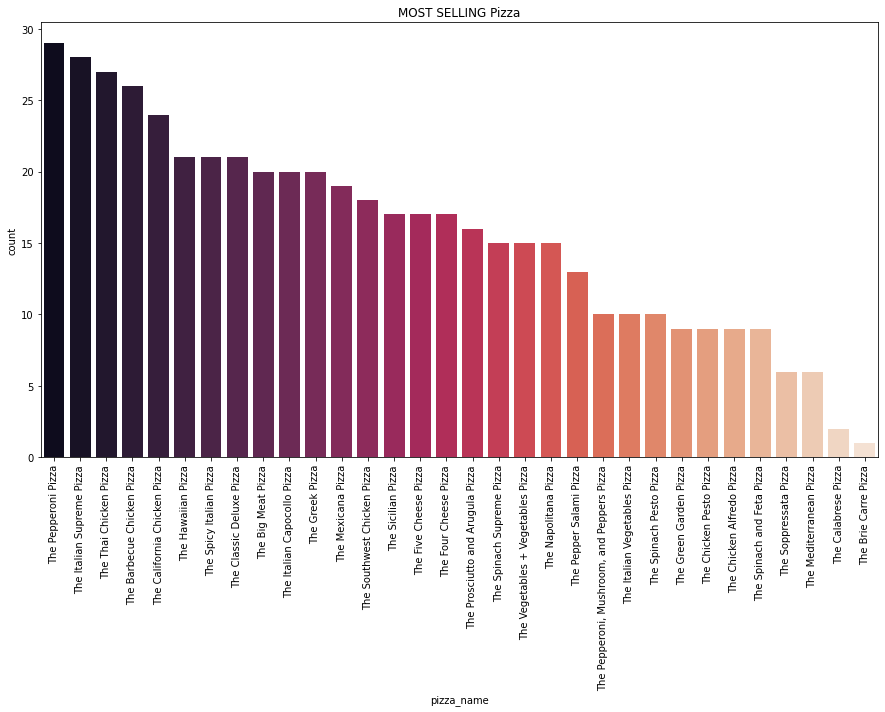

In [10]:
plt.figure(figsize=(15,8))
graph=sns.barplot(x='pizza_name',y='count',palette="rocket",data=MostOrderedPizza)
graph.set_title('MOST SELLING Pizza')
plt.xticks(rotation=90)

In [11]:
MostOrderedPizza=df.groupby("pizza_size")["order_id"].agg(["count"]).sort_values(by="count",ascending=False).reset_index()
print(MostOrderedPizza)

  pizza_size  count
0          L    217
1          M    140
2          S    137
3         XL      6


Text(0.5, 1.0, 'MOST SELLING Pizza')

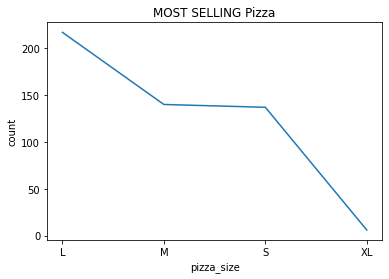

In [12]:
graph=sns.lineplot(x='pizza_size',y='count',palette="rocket",data=MostOrderedPizza)
graph.set_title('MOST SELLING Pizza')

In [13]:
MostOrderedPizza=df.groupby("unit_price")["order_id"].agg(["count"]).sort_values(by="count",ascending=False).reset_index()
print(MostOrderedPizza)


    unit_price  count
0        20.75    110
1        12.00     56
2        16.00     44
3        16.50     39
4        12.50     38
5        16.75     36
6        20.25     33
7        12.75     27
8        20.50     21
9        18.50     17
10       17.95     11
11        9.75      9
12       16.25      9
13       15.25      9
14       10.50      7
15       14.75      6
16       11.00      6
17       25.50      6
18       13.25      4
19       12.25      4
20       17.50      3
21       21.00      3
22       14.50      1
23       23.65      1


Text(0.5, 1.0, 'MOST SELLING Pizza')

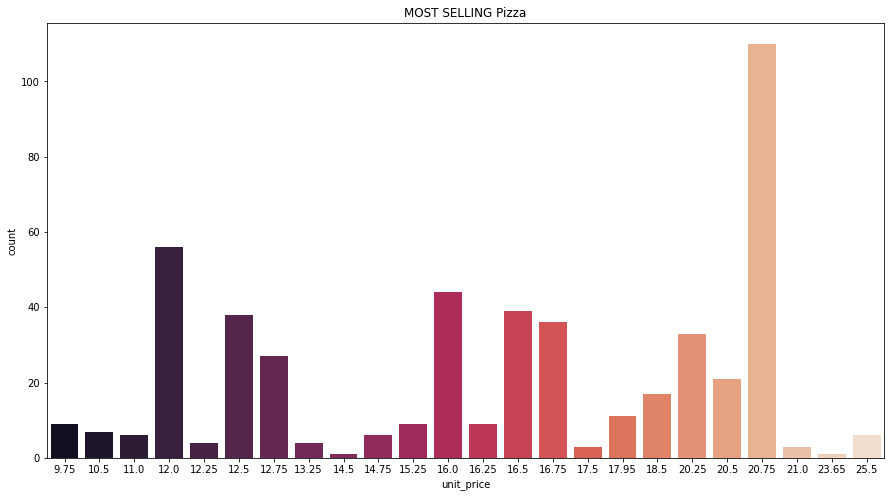

In [14]:
plt.figure(figsize=(15,8))
graph=sns.barplot(x='unit_price',y='count',palette="rocket",data=MostOrderedPizza)
graph.set_title('MOST SELLING Pizza')

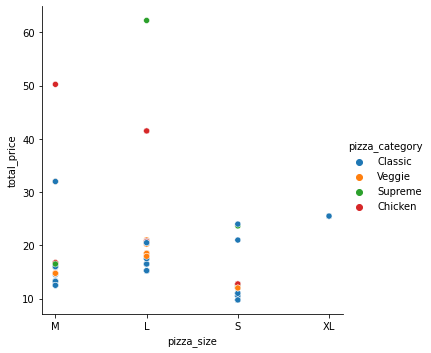

In [24]:

sns.relplot(x='pizza_size', y='total_price', hue='pizza_category', data=df);

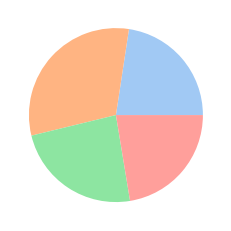

In [38]:
#Plot
colors = sns.color_palette('pastel')[0:7]
plt.pie(x='count', data=Topcategory,colors = colors);
